In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv("h.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

D:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


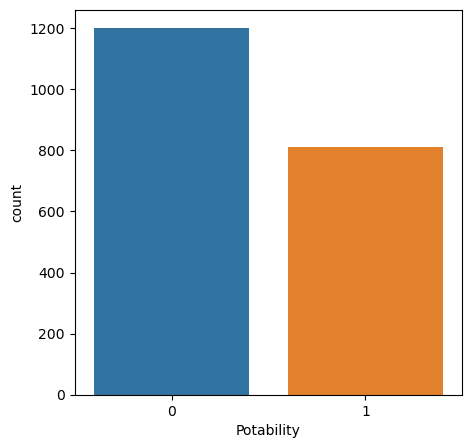

In [4]:
plt.figure(figsize=(5,5))
sns.countplot(data.Potability)

plt.show()

In [11]:
pip install pycaret


     -------------------------------------- 484.4/484.4 kB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 17.5/17.5 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 kB ? eta 0:00:00
     ---------------------------------------- 73.4/73.4 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 572.7/572.7 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 81.8/81.8 kB 4.5 MB/s eta 0:00:00
     -------------------------------------- 106.8/106.8 kB 6.0 MB/s eta 0:00:00
     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 65.9/65.9 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.6 MB/s eta 0:00:00
     -------------------------------------- 153.4/153.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ----------------------

In [12]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

In [14]:
from pycaret.classification import *
clf = setup(data,target = "Potability", session_id = 786)
compare_models()

,Description,Value
0,Session id,786
1,Target,Potability
2,Target type,Binary
3,Original data shape,"(2011, 10)"
4,Transformed data shape,"(2011, 10)"
5,Transformed train set shape,"(1407, 10)"
6,Transformed test set shape,"(604, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6802,0.6956,0.3952,0.6778,0.4977,0.2870,0.3100,0.1060
rf,Random Forest Classifier,0.6780,0.6844,0.4040,0.6696,0.5024,0.2854,0.3063,0.1020
qda,Quadratic Discriminant Analysis,0.6745,0.7091,0.3866,0.6795,0.4879,0.2746,0.3013,0.0220
gbc,Gradient Boosting Classifier,0.6489,0.6554,0.3581,0.6232,0.4505,0.2186,0.2397,0.0830
lightgbm,Light Gradient Boosting Machine,0.6432,0.6658,0.4869,0.5719,0.5232,0.2416,0.2453,0.1250
nb,Naive Bayes,0.6212,0.6280,0.2506,0.5728,0.3474,0.1344,0.1581,0.0160
ridge,Ridge Classifier,0.5984,0.0000,0.0282,0.6267,0.0534,0.0137,0.0499,0.0140
lda,Linear Discriminant Analysis,0.5970,0.5189,0.0299,0.5867,0.0564,0.0115,0.0421,0.0280
dummy,Dummy Classifier,0.5970,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0240
dt,Decision Tree Classifier,0.5956,0.5784,0.4902,0.4981,0.4927,0.1570,0.1576,0.0160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=786, verbose=0, warm_start=False)

In [15]:
model = create_model("et")
predict = predict_model(model,data=data)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6525,0.6544,0.3509,0.6250,0.4494,0.2238,0.2437
1,0.6879,0.7289,0.3860,0.7097,0.5000,0.3009,0.3304
2,0.6596,0.6682,0.3158,0.6667,0.4286,0.2279,0.2602
3,0.6950,0.7311,0.4035,0.7188,0.5169,0.3188,0.3472
4,0.6454,0.6211,0.3333,0.6129,0.4318,0.2055,0.2257
5,0.6525,0.7076,0.4211,0.6000,0.4948,0.2422,0.2510
6,0.7163,0.7422,0.4737,0.7297,0.5745,0.3758,0.3956
7,0.7143,0.7067,0.4107,0.7667,0.5349,0.3548,0.3909
8,0.7071,0.7133,0.4821,0.6923,0.5684,0.3574,0.3708


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9040,0.9738,0.8126,0.9414,0.8723,0.7961,0.8016


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
3,8.316766,214.373398,22018.417969,8.059333,356.886139,363.266510,18.436525,100.341675,4.628770,0,0,1.00
4,9.092223,181.101517,17978.986328,6.546600,310.135742,398.410828,11.558279,31.997993,4.075076,0,0,1.00
5,5.584086,188.313324,28748.687500,7.544869,326.678375,280.467926,8.399734,54.917862,2.559708,0,0,1.00
6,10.223862,248.071732,28749.716797,7.513409,393.663391,283.651642,13.789696,84.603554,2.672989,0,0,0.62
7,8.635849,203.361526,13672.091797,4.563009,303.309784,474.607635,12.363816,62.798309,4.401425,0,0,1.00


In [16]:
predict.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,prediction_label,prediction_score
3267,8.989900,215.047363,15921.412109,6.297311,312.931030,390.410217,9.899116,55.069305,4.613843,1,0,0.62
3268,6.702547,207.321091,17246.919922,7.708117,304.510223,329.265991,16.217302,28.878601,3.442983,1,1,1.00
3269,11.491011,94.812546,37188.824219,9.263166,258.930603,439.893616,16.172756,41.558502,4.369264,1,1,1.00
3270,6.069616,186.659042,26138.779297,7.747548,345.700256,415.886963,12.067619,60.419922,3.669712,1,0,0.74
3271,4.668102,193.681732,47580.992188,7.166639,359.948578,526.424194,13.894419,66.687698,4.435821,1,1,1.00


In [17]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
